FileNotFoundError: [Errno 2] No such file or directory: '/Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/MT-Soft-Information-QEC/Thesis/img/4_RepetitionCodes/avg_benefit_per_round.pdf'

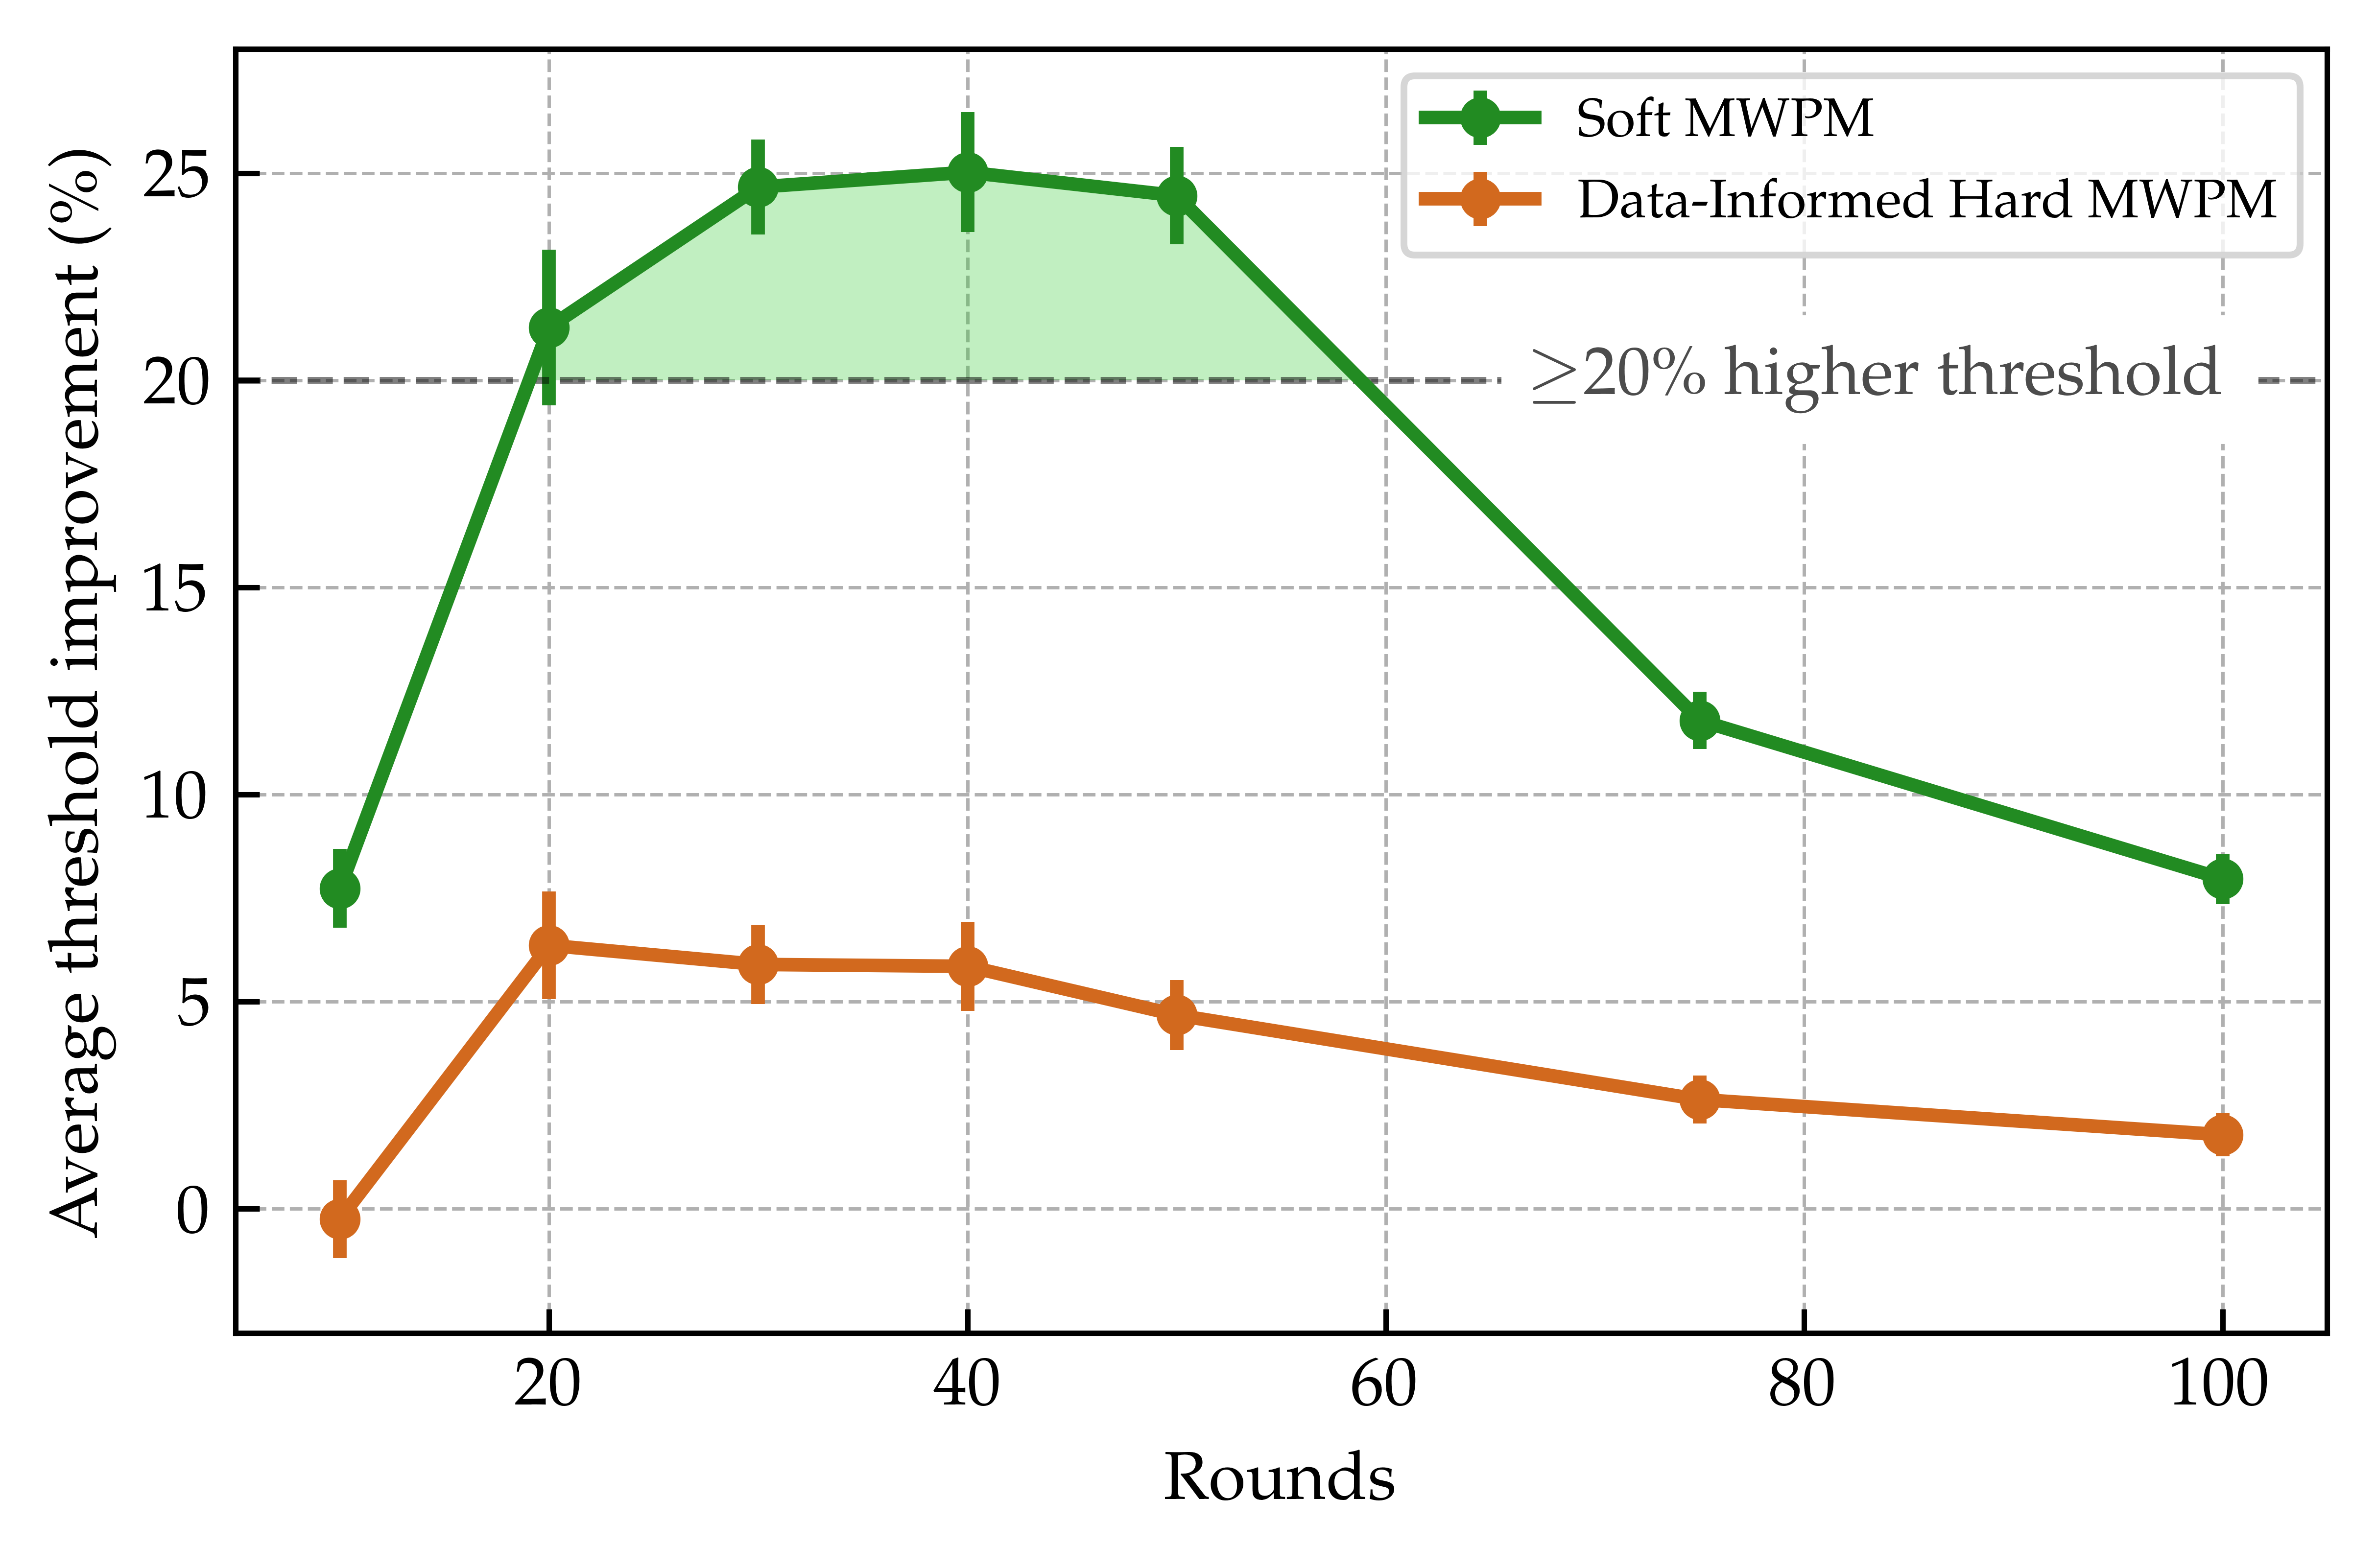

In [1]:
%reload_ext autoreload
%autoreload 2

from soft_info import analyze_lambda_ratios, save_plot, mean_lambda_plot

DEVICE = 'ibm_sherbrooke'
states = ['X0', 'Z0', 'X1', 'Z1']

lambda_per_state, lambda_err_per_state, fig = analyze_lambda_ratios(DEVICE, states, plot_individual_states=False)

# save_plot(fig, '4_RepetitionCodes/avg_benefit_per_round.pdf', format='pdf')

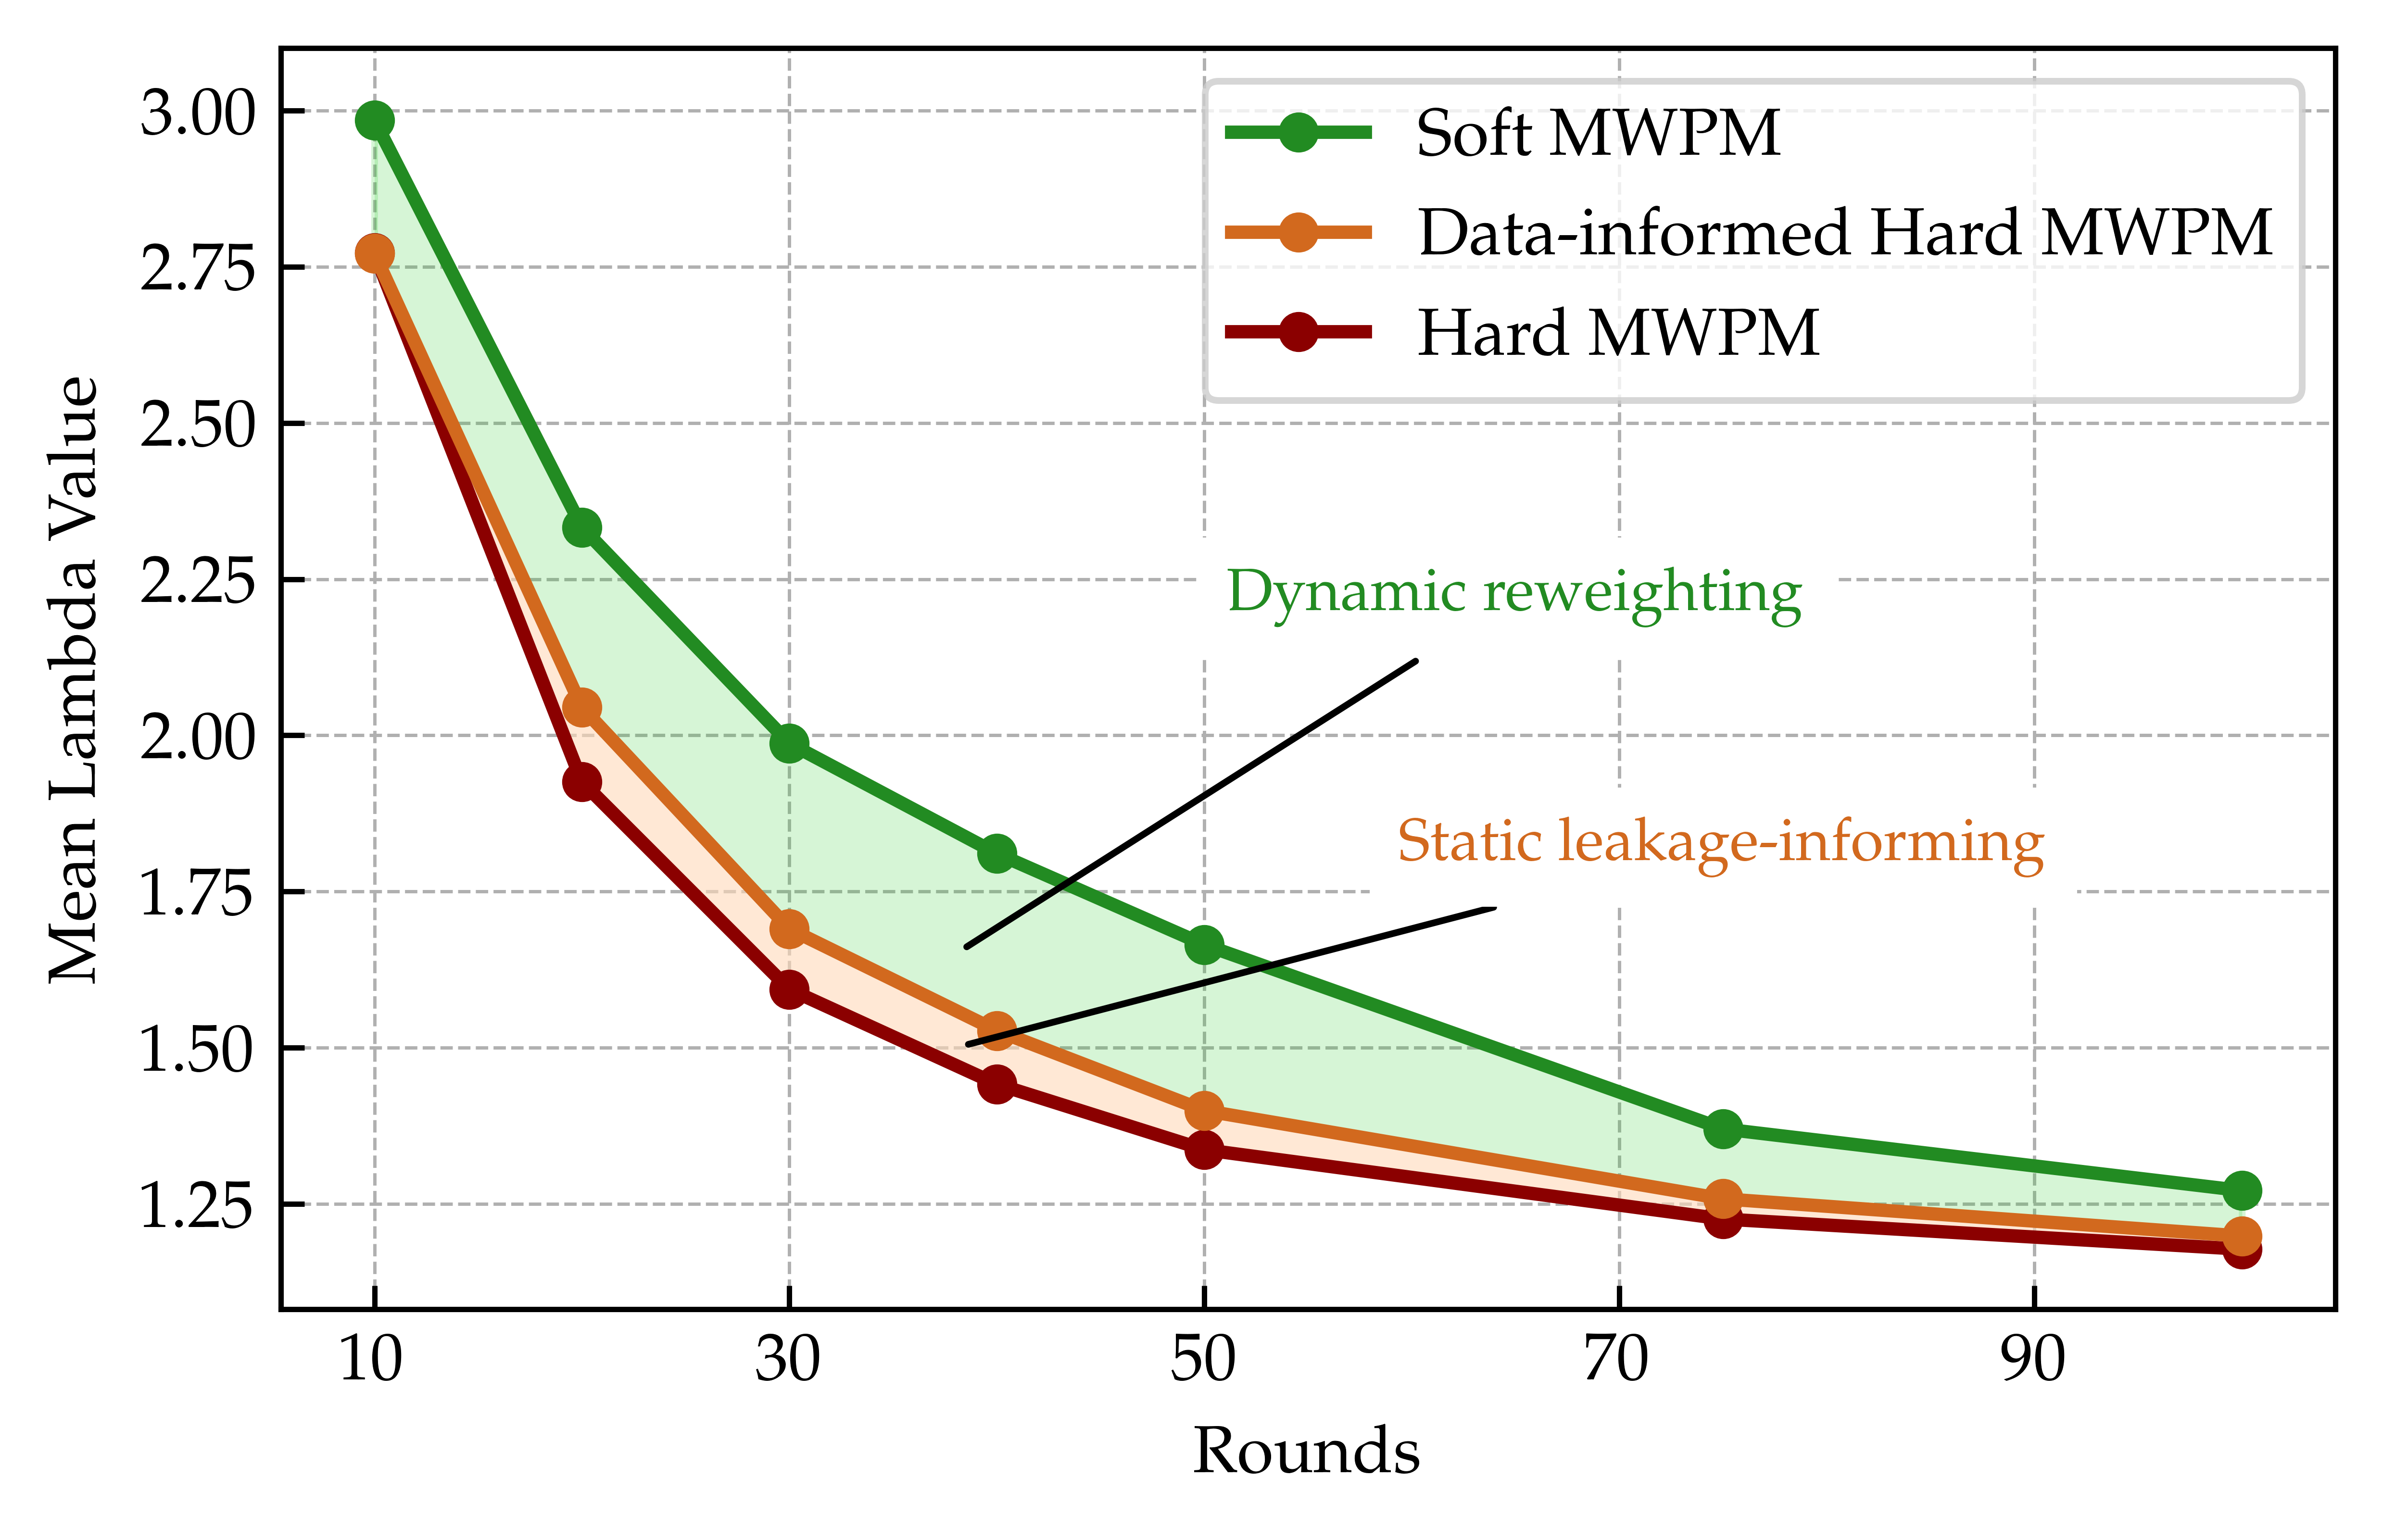

In [2]:
fig = mean_lambda_plot(lambda_per_state, lambda_err_per_state)
save_plot(fig, '4_RepetitionCodes/mean_lambda_per_round.pdf', format='pdf')

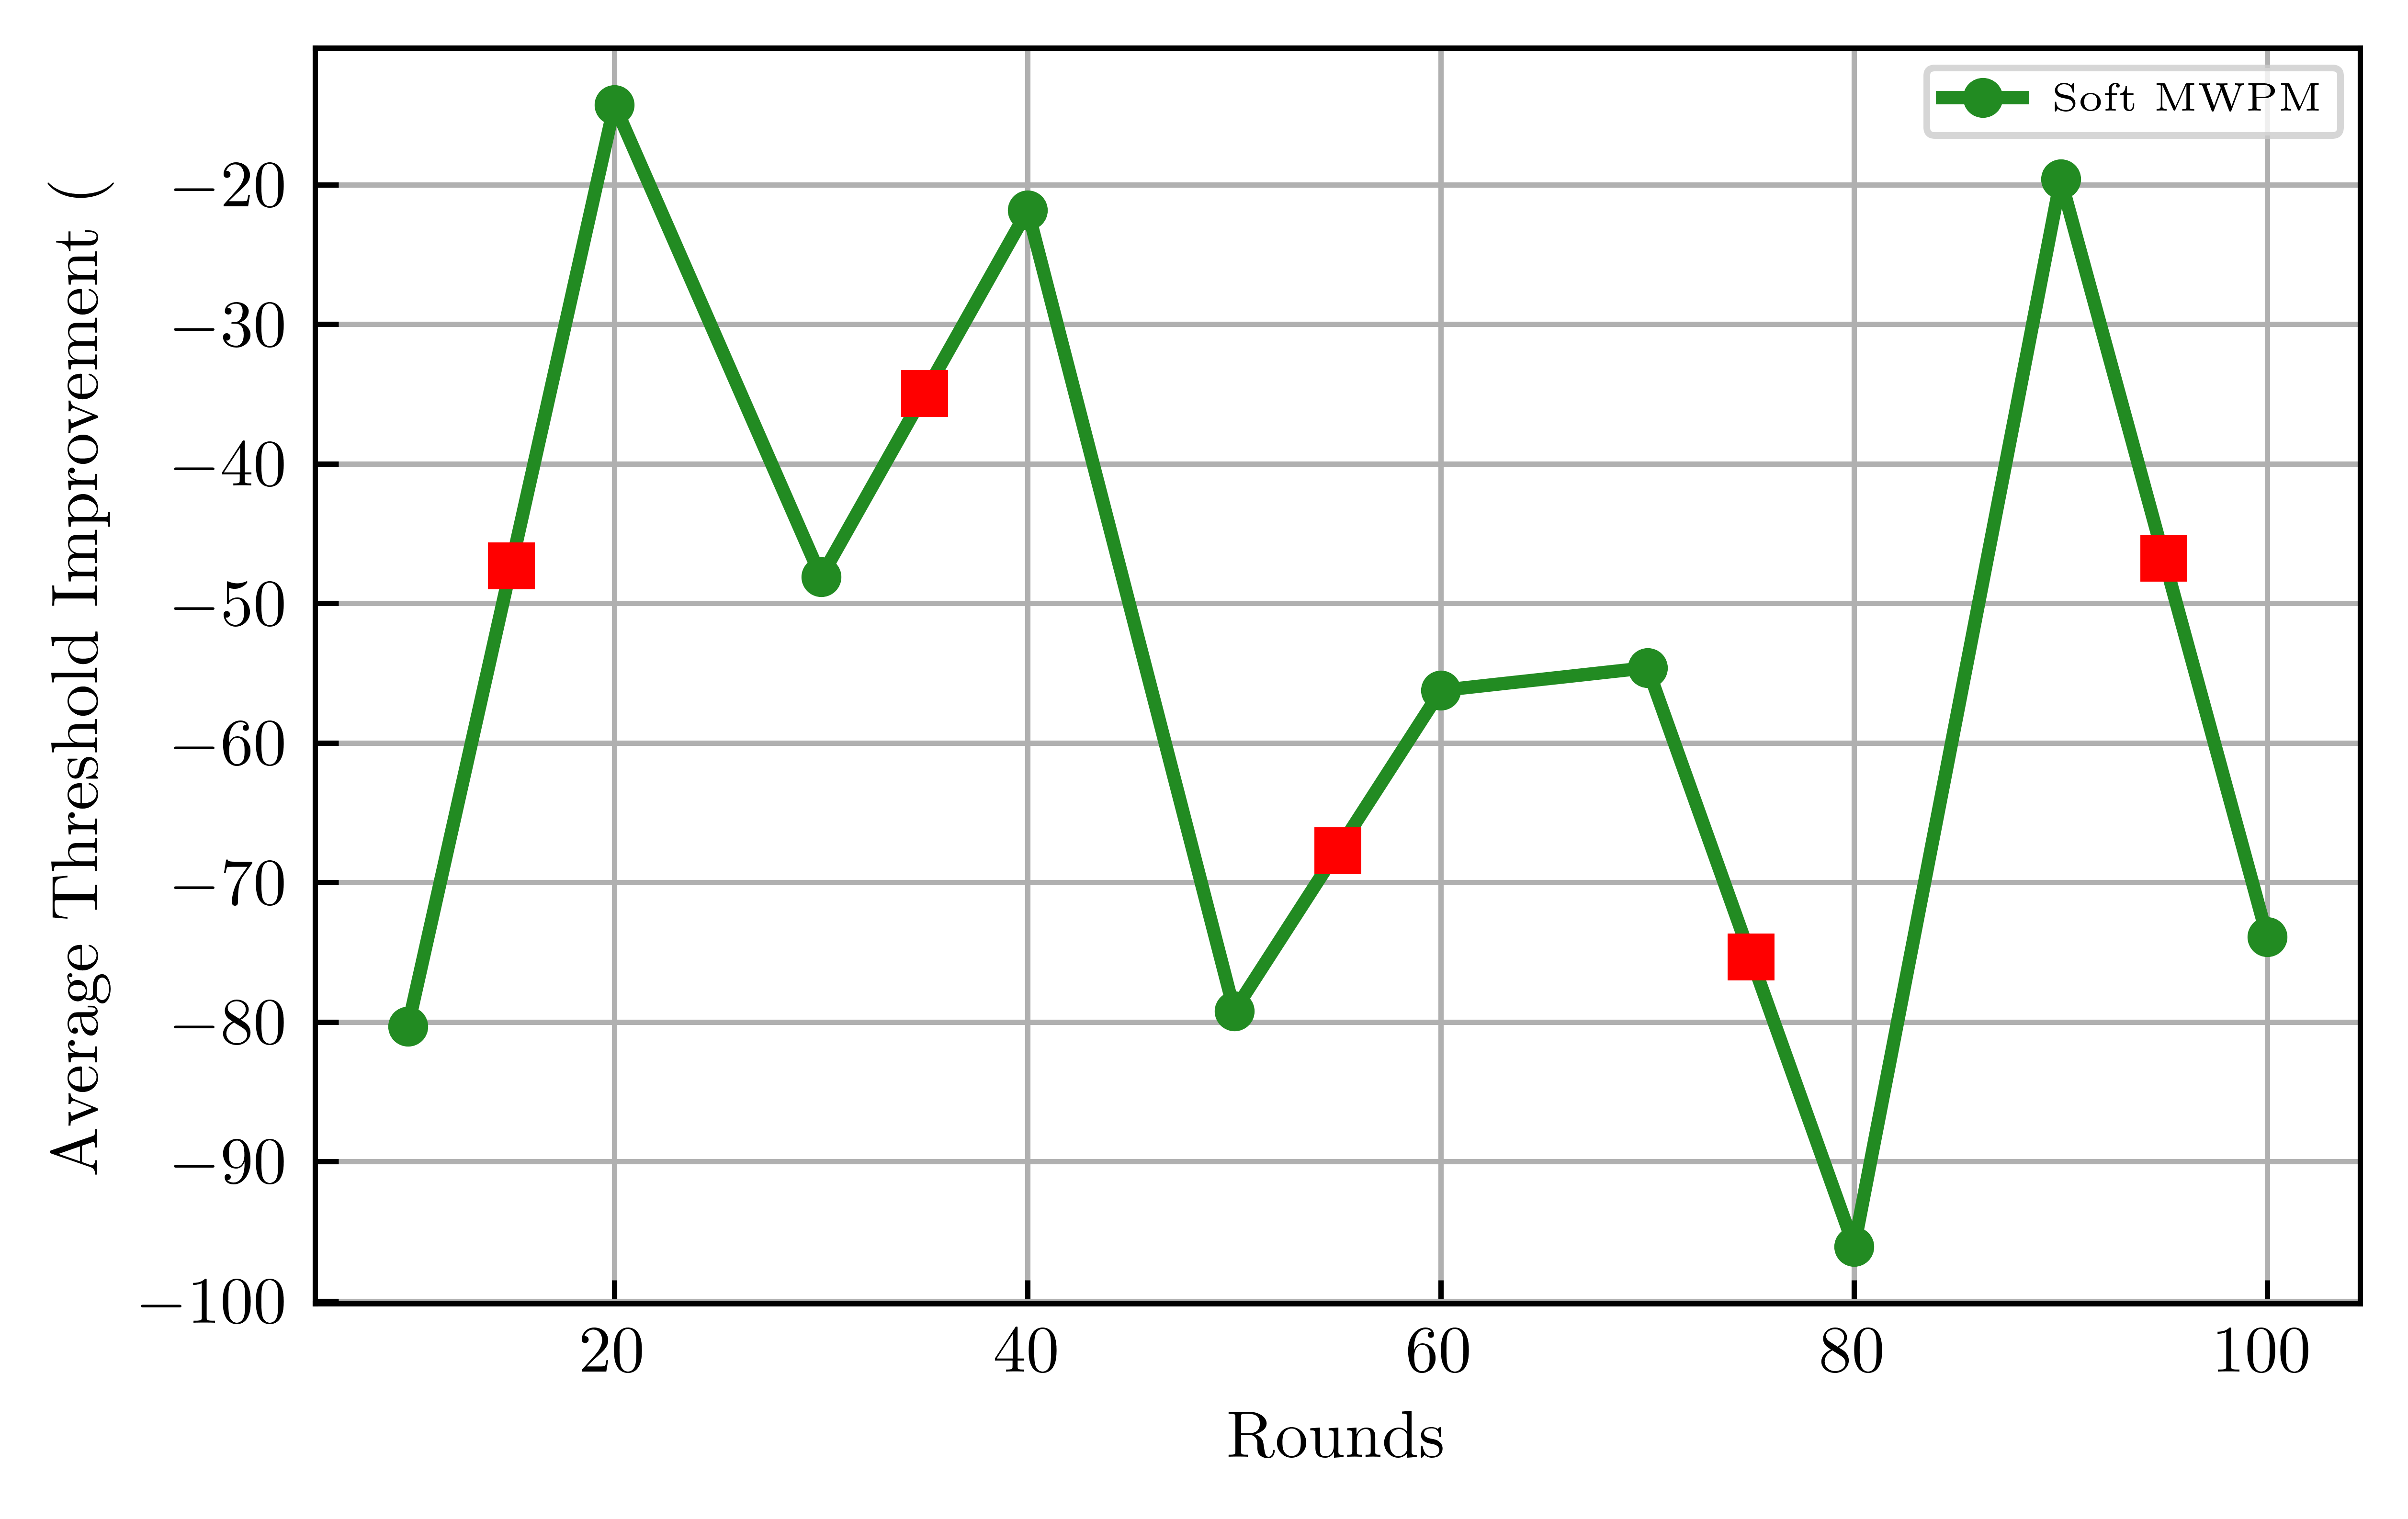

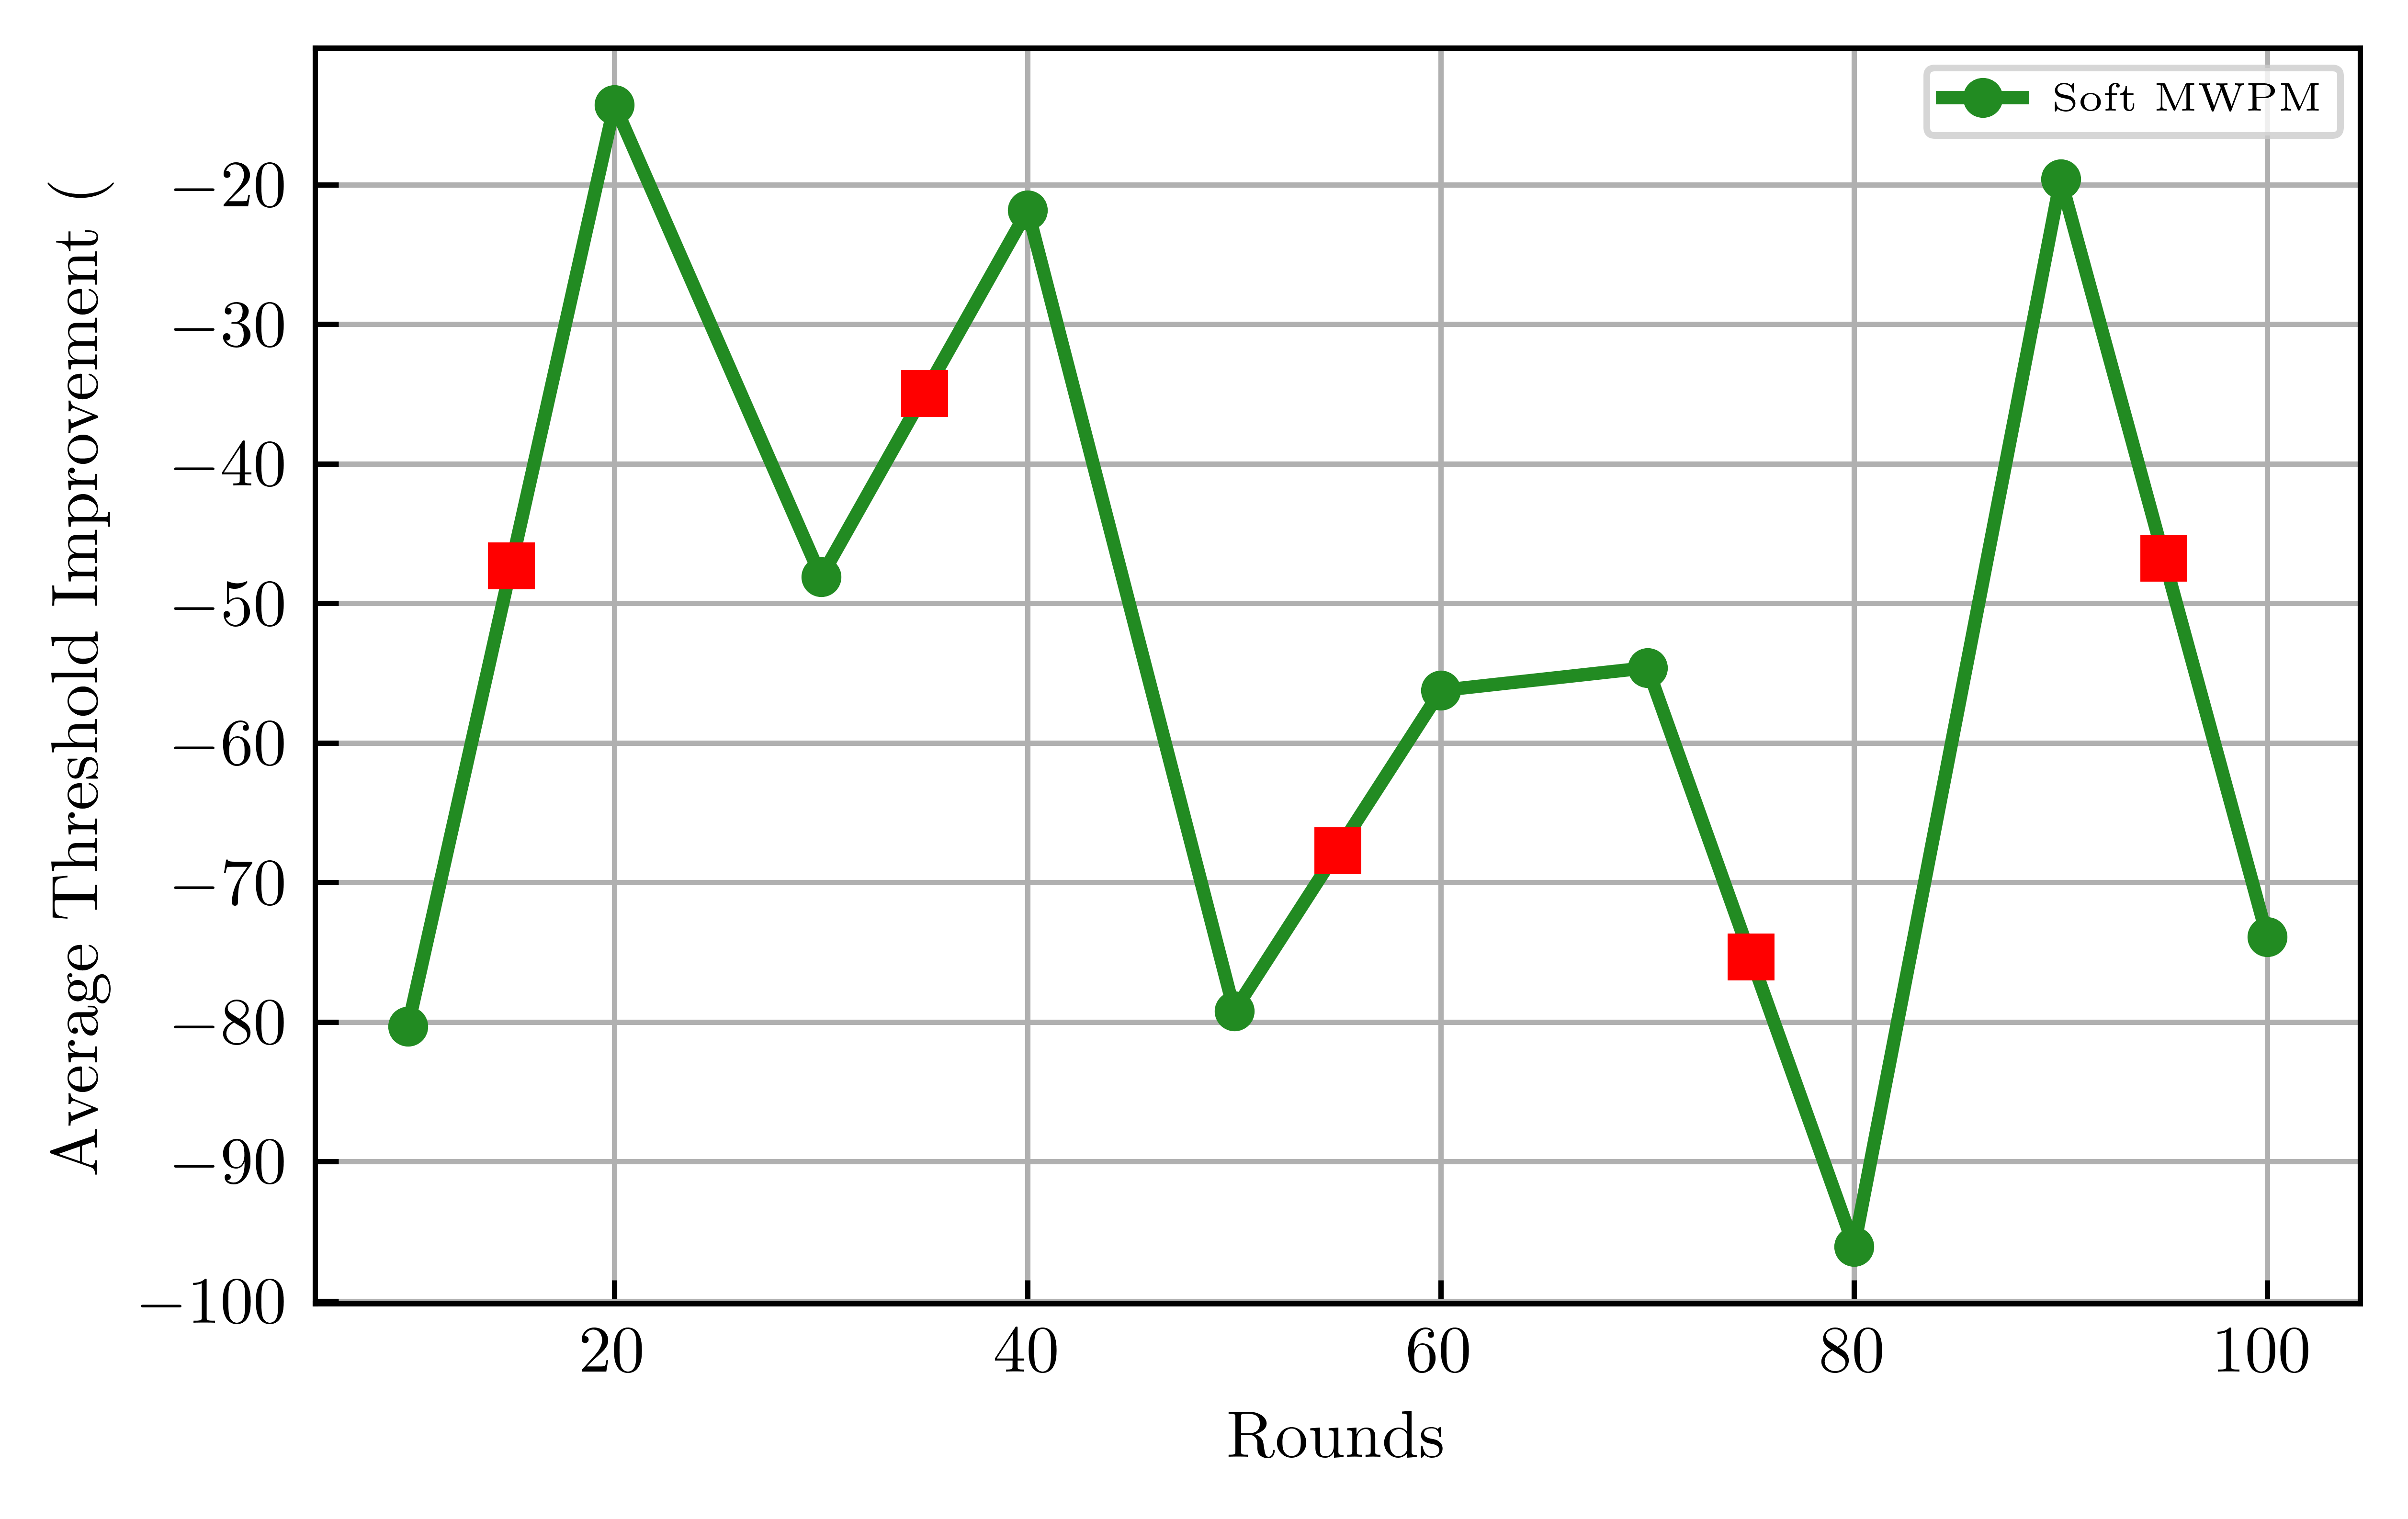

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plot_interpolated_points(sorted_rounds, mean_ratio_S, interpolation_points):
    fig, ax = plt.subplots()
    # Convert to percentage and adjust
    mean_ratio_adjusted = (mean_ratio_S - 1) * 100
    
    # Plot the main data line
    ax.plot(sorted_rounds, mean_ratio_adjusted, 'o-', color='forestgreen', markersize=5, linewidth=2, label='Soft MWPM')

    # Interpolate and plot points at specific rounds
    for point in interpolation_points:
        if point in sorted_rounds:
            idx = np.where(sorted_rounds == point)[0][0]
            interpolated_value = mean_ratio_adjusted[idx]
            ax.plot(point, interpolated_value, 'rs')  # 'rs' for red square
        else:
            idx = np.searchsorted(sorted_rounds, point) - 1
            if idx < 0 or idx >= len(sorted_rounds) - 1:
                print(f"Point {point} is out of the bounds of the data")
                continue
            # Linear interpolation
            x1, x2 = sorted_rounds[idx], sorted_rounds[idx + 1]
            y1, y2 = mean_ratio_adjusted[idx], mean_ratio_adjusted[idx + 1]
            slope = (y2 - y1) / (x2 - x1)
            interpolated_value = y1 + slope * (point - x1)
            ax.plot(point, interpolated_value, 'rs')  # 'rs' for red square

    ax.set_xlabel('Rounds')
    ax.set_ylabel('Average Threshold Improvement (%)')
    ax.grid(True)
    ax.legend()

    plt.show()
    return fig

# Example usage
sorted_rounds = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # Example sorted_rounds array
mean_ratio_S = np.random.rand(10)  # Random generated mean_ratio_S values
interpolation_points = [15, 35, 55, 75, 95]  # Points where you want to interpolate values

plot_interpolated_points(sorted_rounds, mean_ratio_S, interpolation_points)
